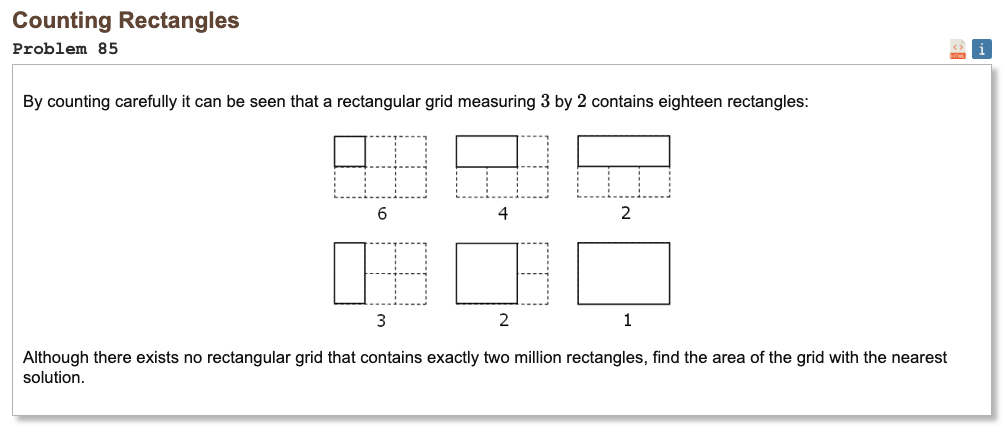

## Initial approach

Understand the 3x2 case in the problem  

* a grid is made of rows and columns
* a rectangle is defined by two horizontal lines and two vertical lines

itertools.combination is needed.

* it helps to choose 2 different lines from a list
* we need 2 horizontal lines to make top and bottom of rectangle
* we need 2 vertical lines to make left and right of a rectangle
* it gives all possible pairs without repating.

In [1]:
import itertools
list(itertools.combinations([0, 1, 2, 3], 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

So, 3x2 case:

In [2]:
rows, cols = 3, 2
row_lines = rows + 1
col_lines = cols + 1

row_combinations = list(itertools.combinations(range(row_lines), 2))
col_combinations = list(itertools.combinations(range(col_lines), 2))

rectangles = []

for (r1, r2) in row_combinations:
    for (c1, c2) in col_combinations:
        rectangles.append(((r1, r2), (c1, c2)))

print("Number of rectangles:", len(rectangles))
print("First 5 rectangles:", rectangles[:5])

Number of rectangles: 18
First 5 rectangles: [((0, 1), (0, 1)), ((0, 1), (0, 2)), ((0, 1), (1, 2)), ((0, 2), (0, 1)), ((0, 2), (0, 2))]


First 5 rectangles:

((0, 1), (0, 1))  
((0, 1), (0, 2))  
((0, 1), (1, 2))  
((0, 2), (0, 1))  
((0, 2), (0, 2))  

In [3]:
%%time

import itertools

target = 2_000_000
closest_diff = float('inf')
best_area = 0
best_dims = (0, 0)

print_count = 0
max_prints = 200
stopped = False

for rows in range(1, 50):
    for cols in range(1, 50):
        row_lines = rows + 1
        col_lines = cols + 1

        row_combinations = list(itertools.combinations(range(row_lines), 2))
        col_combinations = list(itertools.combinations(range(col_lines), 2))

        rectangles = []

        for (r1, r2) in row_combinations:
            for (c1, c2) in col_combinations:
                rectangles.append(((r1, r2), (c1, c2)))

        rect_count = len(rectangles)
        diff = abs(target - rect_count)

        if diff < closest_diff:
            closest_diff = diff
            best_area = rows * cols
            best_dims = (rows, cols)
            print(f"New best: {rows}x{cols} = {rect_count} rectangles, diff = {diff}")
            print_count += 1
            if print_count >= max_prints:
                stopped = True
                break
    if stopped:
        break

print("\nBest grid:", best_dims)
print("Area:", best_area)
print("Rectangle count:", target - closest_diff)

New best: 1x1 = 1 rectangles, diff = 1999999
New best: 1x2 = 3 rectangles, diff = 1999997
New best: 1x3 = 6 rectangles, diff = 1999994
New best: 1x4 = 10 rectangles, diff = 1999990
New best: 1x5 = 15 rectangles, diff = 1999985
New best: 1x6 = 21 rectangles, diff = 1999979
New best: 1x7 = 28 rectangles, diff = 1999972
New best: 1x8 = 36 rectangles, diff = 1999964
New best: 1x9 = 45 rectangles, diff = 1999955
New best: 1x10 = 55 rectangles, diff = 1999945
New best: 1x11 = 66 rectangles, diff = 1999934
New best: 1x12 = 78 rectangles, diff = 1999922
New best: 1x13 = 91 rectangles, diff = 1999909
New best: 1x14 = 105 rectangles, diff = 1999895
New best: 1x15 = 120 rectangles, diff = 1999880
New best: 1x16 = 136 rectangles, diff = 1999864
New best: 1x17 = 153 rectangles, diff = 1999847
New best: 1x18 = 171 rectangles, diff = 1999829
New best: 1x19 = 190 rectangles, diff = 1999810
New best: 1x20 = 210 rectangles, diff = 1999790
New best: 1x21 = 231 rectangles, diff = 1999769
New best: 1x22 = 

* It takes too long.
* count grid with a formula:

```python
total_rectangles(m, n) = (m * (m + 1) // 2) * (n * (n + 1) // 2)
```

* pick 2 rows → there are (m * (m + 1)) // 2 ways
* pick 2 columns → there are (n * (n + 1)) // 2 ways
* multiply both → that gives total rectangles in the grid

In [4]:
target = 2_000_000
closest_diff = float('inf')
best_area = 0
best_dims = (0, 0)

for rows in range(1, 100):
    for cols in range(1, 100):
        rect_count = (rows * (rows + 1) // 2) * (cols * (cols + 1) // 2)
        diff = abs(target - rect_count)
        
        if diff < closest_diff:
            closest_diff = diff
            best_area = rows * cols
            best_dims = (rows, cols)

print("Closest rectangle count:", target - closest_diff)
print("Grid size:", best_dims)
print("Area:", best_area)

Closest rectangle count: 1999998
Grid size: (36, 77)
Area: 2772
